# 타이타닉

In [115]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [116]:
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')
combine = [train_df, test_df]

train_df0 = train_df.copy()

데이터 확인하기 

In [117]:
print('++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-----------------------')
print('Train columns :', train_df.columns.values)
print('Test columns : ', test_df.columns.values)
print('++++++++++++++++++++++++++++')


++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-----------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns :  ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
++++++++++++++++++++++++++++


In [118]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*배운 내용 복습
- 수치형 : 관측된 값이 수치로 기록(이산형, 연속형)
- 범주형 : 관측된 데이터가 범주 혹은 항목의 형태로 기록(순위형, 명목형)

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 배운 내용 복습
Data cleaning & preprocessing
- Replacement(대체) : 평균값, 중앙값, 최빈값, 혹은 0을 대체
- Removal(제거) : 전체 혹은 부분 삭제
- Scaling(스케일링) : Standariztion, Normalization, Generalization
- Encoding(인코딩) : 범주형 데이터를 수치형 데이터로 변환

In [120]:
train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [121]:
train_df.info()
train_df_temp = train_df.copy()
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null

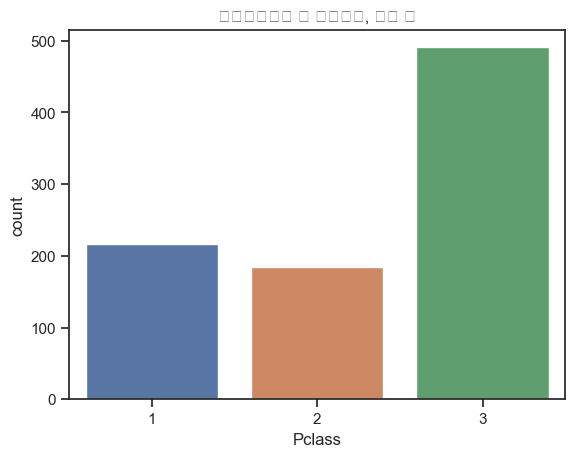

In [122]:
sns.countplot(x="Pclass", data=train_df)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

결측치 채우기

In [123]:
train_df['Age'] = train_df['Age'].fillna(0)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:', train_df['Embarked'].mode()[0])
train_df.info()
#Embarked는 최빈값으로 대체했다.

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [124]:
# 변수 변환
train_df["Sex"] = train_df["Sex"].astype('category')
#numerical 데이터로 변경하고 싶은 categorical 컬럼을 정한 뒤
train_df["Sex"] = train_df["Sex"].cat.codes
#categorical 형 column으로 강제 형변환을 시키고
#cat.codes를 호출해 주면 자동으로 숫자형 리턴을 해주게 됩니다.
#astype는 데이터타입 변경하는 함수
train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes

train_df.tail()

#Male은 1로, Female은 0으로 바뀐다.
#C는 0으로, Q는 1로, S는 2로 바뀐다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.0,0,0,13.00,2
887,1,1,0,19.0,0,0,30.00,2
888,0,3,0,0.0,1,2,23.45,2
889,1,1,1,26.0,0,0,30.00,0
890,0,3,1,32.0,0,0,7.75,1


데이터 탐색 및 시각화

In [125]:
#데이터 통계량 탐색

train_df.describe()
#각 변수들의 일반적인 통계치 확인.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [126]:
 # 데이터 탐색 및 시각화 : Label과의 연관성
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')
    #판다스(Pandas)의 .groupby() 기능은 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리(혹은 적용)하거나 그룹별 통계량을 확인하고자 할 때 유용한 함수
#shape는 Numpy에서 배열의 형태 확인

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
         Fare  Survived
247  512.3292       1.0
196   57.9792       1.0
89    13.8583       1.0
88    13.7917       1.0
86    13.4167       1.0
..        ...       ...
103   15.5500       0.0
180   47.1000       0.0
179   46.9000       0.0
178   42.4000       0.0
124   21.0750       0.0

[248 rows x 2

- pclass 생존율과 높은 연관성을 보인다. 
- 성별 - 여성 (0)과 연관성이 높다. 
- Embarked 는 c, 프랑스와 연관성이 높음. (이것은 프랑스에서 여성탑승자 비율이 높은지 확인해보아야함)

시각화를 통해 파악하기 ! 


In [127]:
#2차원 카테고리 데이터
titanic_size = train_df.pivot_table(
    index="Pclass", columns="Sex", aggfunc="size")
titanic_size

Sex,0,1
Pclass,,
1,94,122
2,76,108
3,144,347


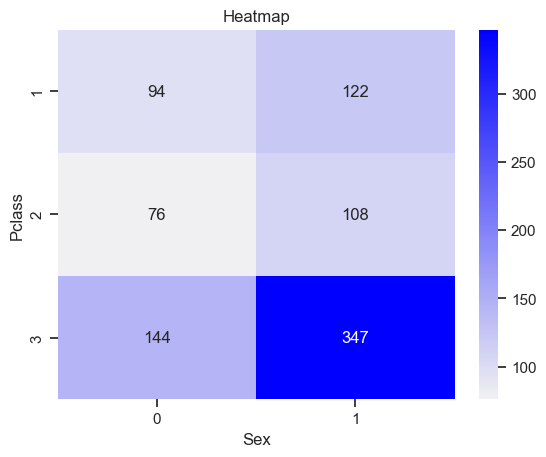

In [128]:
#히트맵으로 그려보기
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "blue", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

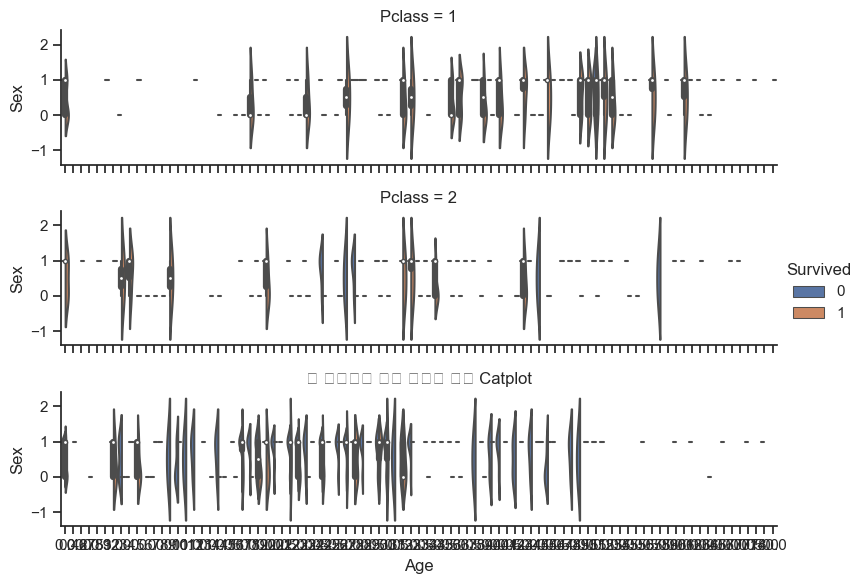

In [129]:
#catplot, 3개 이상 카테고리값 분포보기
data = train_df[train_df.Survived.notnull()]
sns.catplot(x="Age", y="Sex", hue="Survived", row="Pclass", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

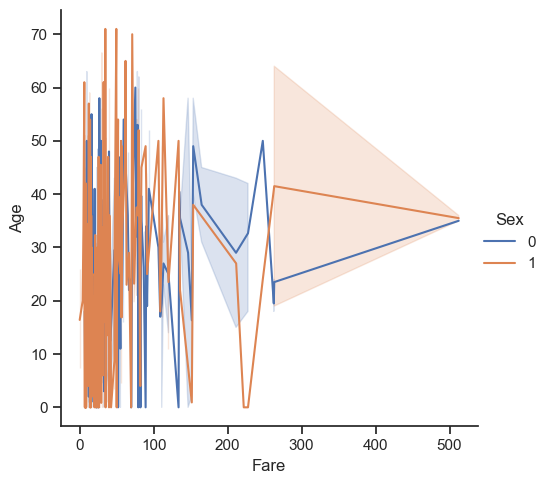

In [130]:
import warnings
warnings.filterwarnings('ignore')

sns.relplot(x= 'Fare',
y= 'Age',
kind= "line",
hue= "Sex",
data= train_df)

In [131]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


IndexError: index 6 is out of bounds for axis 0 with size 6

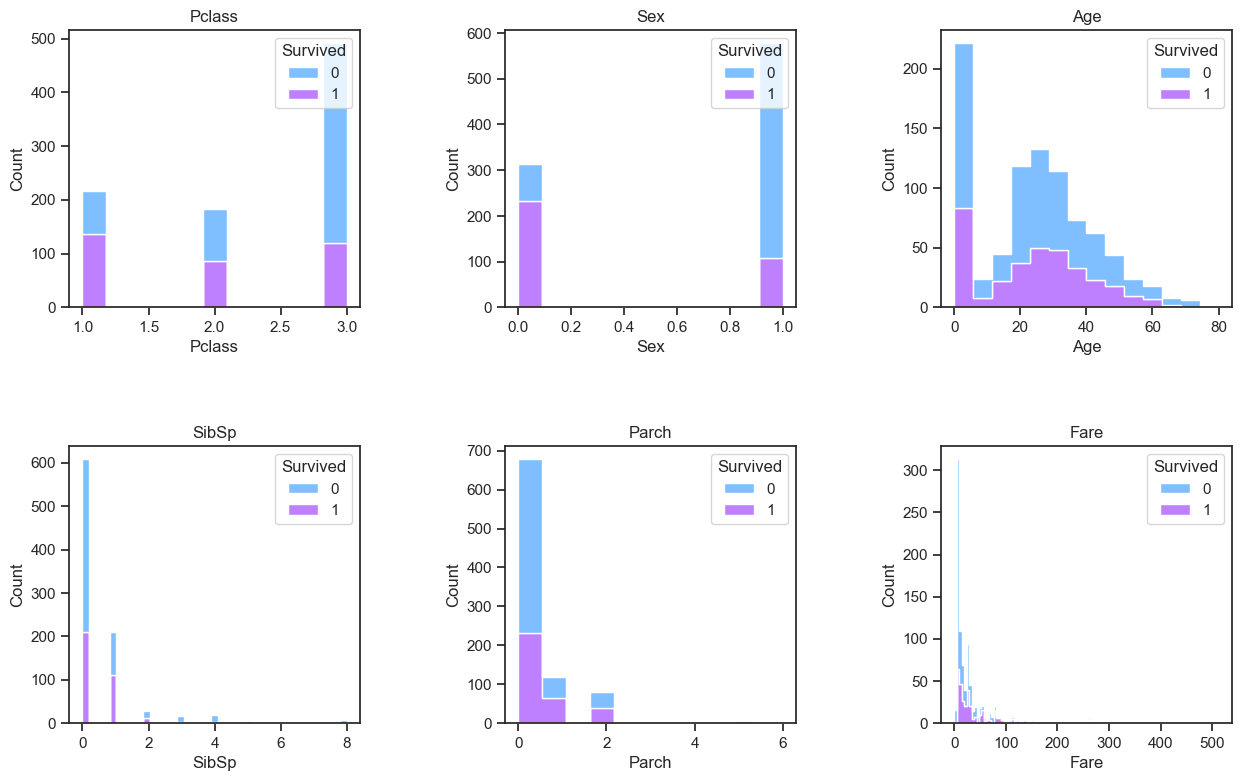

In [132]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

- pclass : /
- 여성 남성 : 여성보다 남성이 더 많이 탑승했지만, 여성의 생존 비율이 훨씬 높다. 
- 나이 : 0에서 큰 값은 , 나이를 알 수 없는 결측치의 경우이다. 따라서 0은 무시하고 데이터를 확인하면 20-30가 많이 탑승했지만 생존율이 사망률보다 다른 나이대에 비해 낮다는 것을 알 수 있고, 60대가 높다.


-> 확인 결과, 각각의 변수끼리의 관계도 잘 확인해주어야 한다는 것을 알 수 있었음.
- 우리가 사용하는 변수는 이산확률변수값이어서 산포대를 ? 나타내는데 어려운 부분이 있어서 랜덤수를 더해서 시각화를 진행 ! 
- 이후에 데이터 분석작업에 영향 끼치지 않도록 트레인디에프엔드로 따로 지정 !

<Figure size 900x900 with 0 Axes>

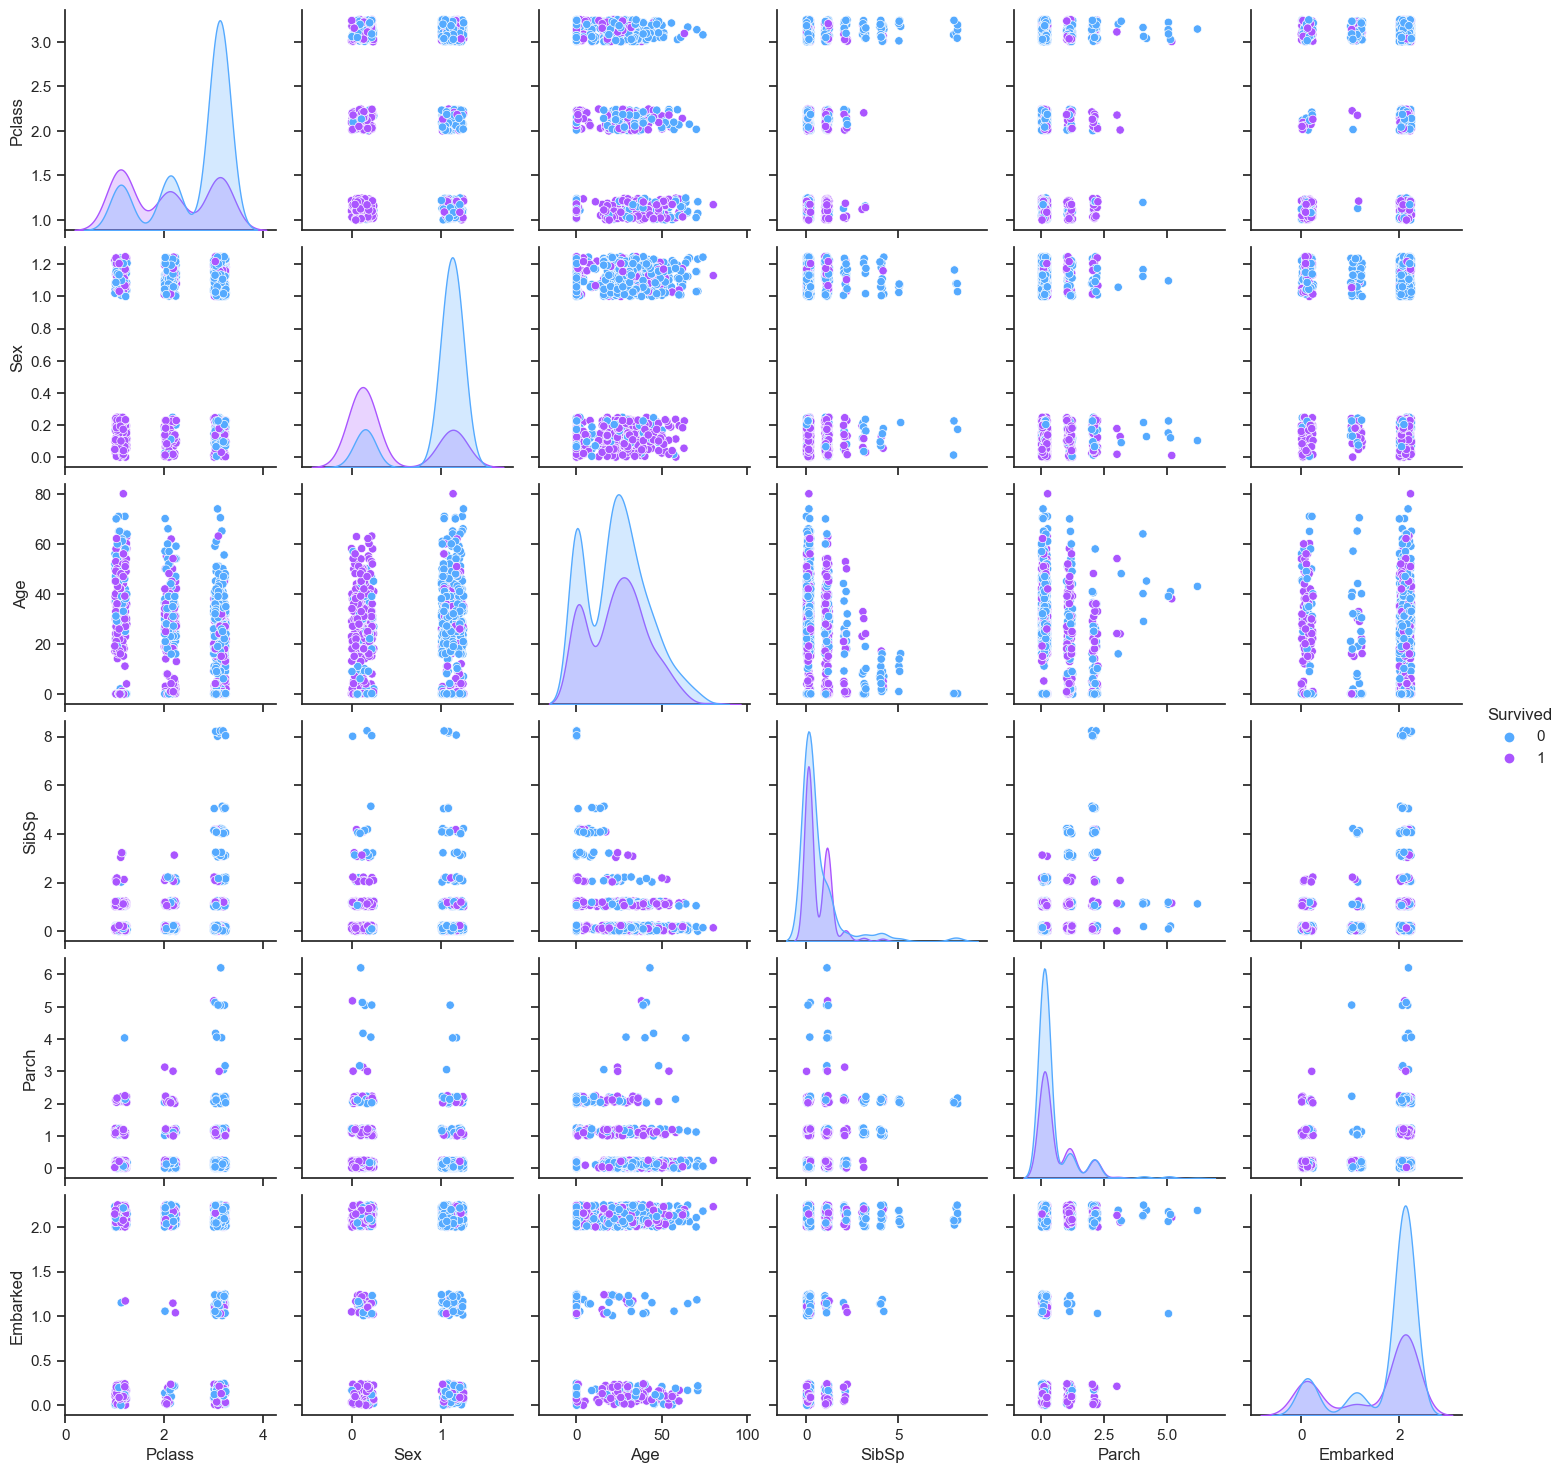

In [ ]:
# 다변량시각화
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

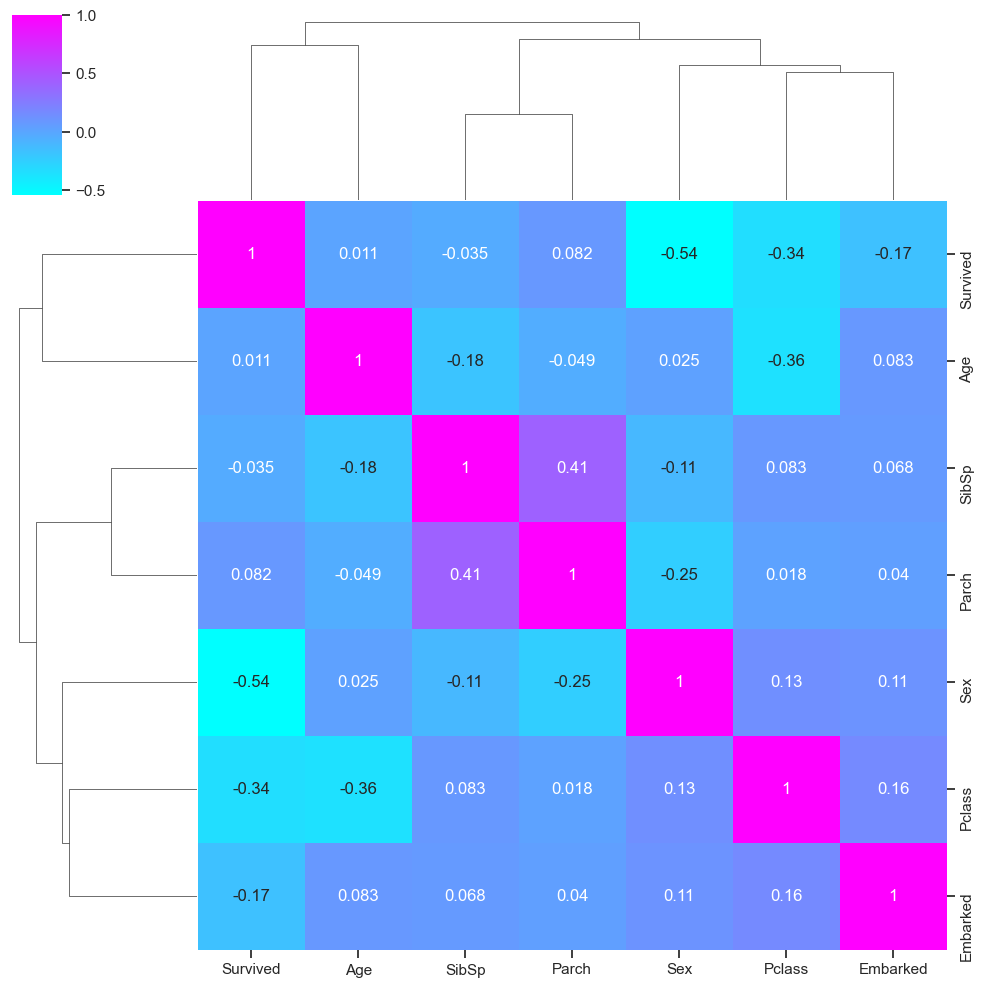

In [ ]:
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'cool')

대각선 : 자기 자신과의 상관관계 = 1 
- 생존률 : 성별과 음의 상관관계 = 여성이 더 큰 상관관계를 띄기 때문. 

모델링하기
1. train/test 데이터 준비

In [ ]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)

(891, 6) (891,)


In [ ]:
test_df = test_df.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:' , test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

test_df.info()
X_test = test_df.copy()
print(X_test.shape)

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
dtypes: float64(1), int64(3), int8(2)
memory usage: 14.0 KB
(418, 6)


In [ ]:
#Cross validation + Model evaluation

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#roc auc를 할 거기 때문에 라이브러리 불러왔다.


In [ ]:
def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

In [ ]:
models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8754203633956852
model: KNeighborsClassifier(n_neighbors=3)


c:\Users\ze-ro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ze-ro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Score: 0.8703704871015019
model: SGDClassifier(max_iter=100)
Score: 0.6521026049135636
model: SGDClassifier()
Score: 0.6840021589422759
model: LogisticRegression()
Score: 0.7946152512725153
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9194722410451173
model: RandomForestClassifier()
Score: 0.9424815229210332


AUC: 0.7761401557285872


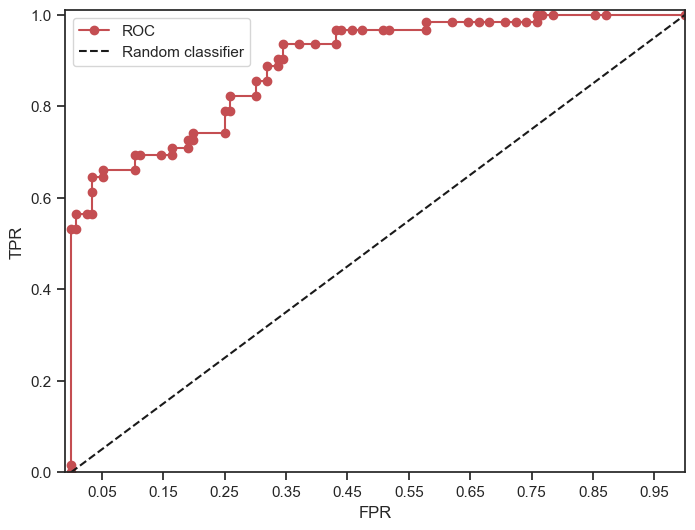

In [ ]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,y_val))


### 레퍼런스 
- https://datascienceschool.net/01%20python/05.05%20%ED%8C%90%EB%8B%A4%EC%8A%A4%EC%9D%98%20%EC%8B%9C%EA%B0%81%ED%99%94%20%EA%B8%B0%EB%8A%A5.html

### 회고
1. catplot그래프를 이용해서 3가지 카테고리를 한번에 표현하고 싶었는데 이상하게 뜬다. 허나 원인을 알아내지 못하였다. 
2. sns. 이용한 그래프 그리기 위주로 학습하였는데 각 그래프가 어떤 상황에 적합할지 어떻게 활용하면 좋을지가 아직 어색하다. 많이 활용해보아야 할 것 같다.
3. 전체적인 과정은 느낌이 오는데 아직 세세한 코드작성에 대해서는 어렵다 ... 